Problem Statement:

Understanding COVID-19 trends helps in planning public health
policies.

Objective:

Analyze global COVID-19 data to visualize trends and compare
countries.

Requirements:

Dataset: confirmed, recovered, deaths per day

Clean data, plot cumulative cases

Use line plots, area charts, heatmaps

Expected Outcome:

Visual story of pandemic growth, recoveries, and death rates.

## 📈 Cumulative Deaths Over Time

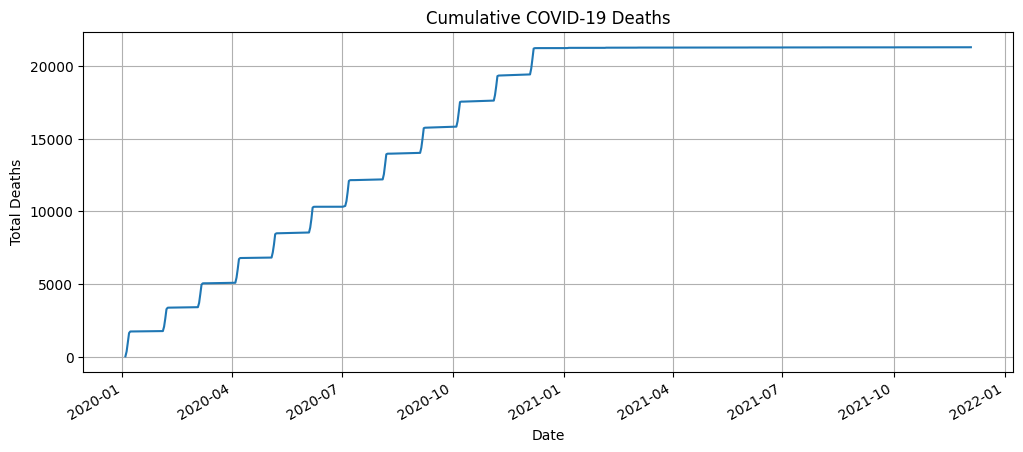

## 🧓 Deaths by Age

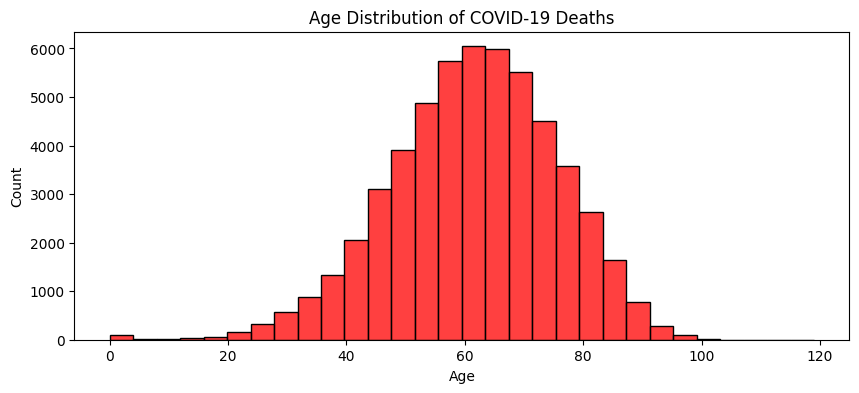

## 🩺 Mortality by Comorbidities

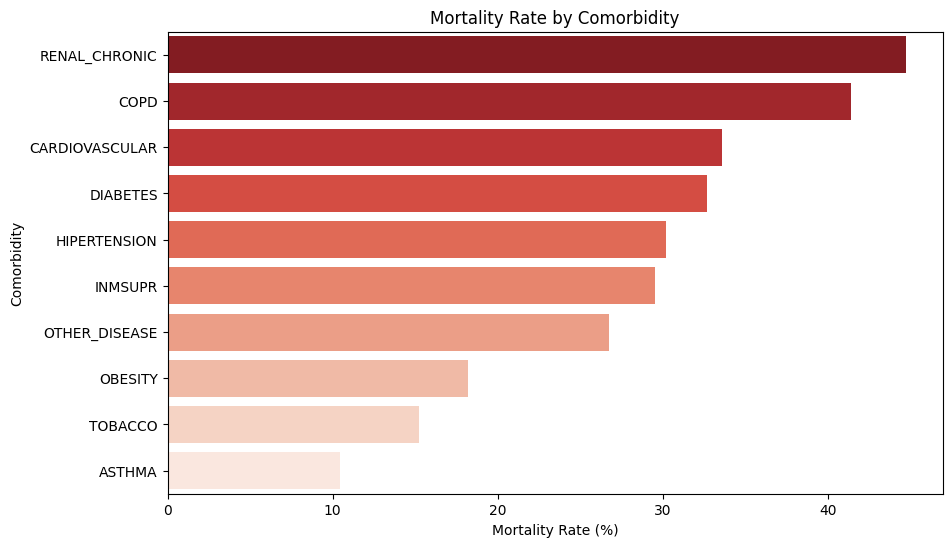

## 🛏️ ICU & Intubation Outcomes

ICU Mortality Rate: 57.32%
Intubated Mortality Rate: 83.90%


## 🔥 Heatmap of Comorbidity & Death

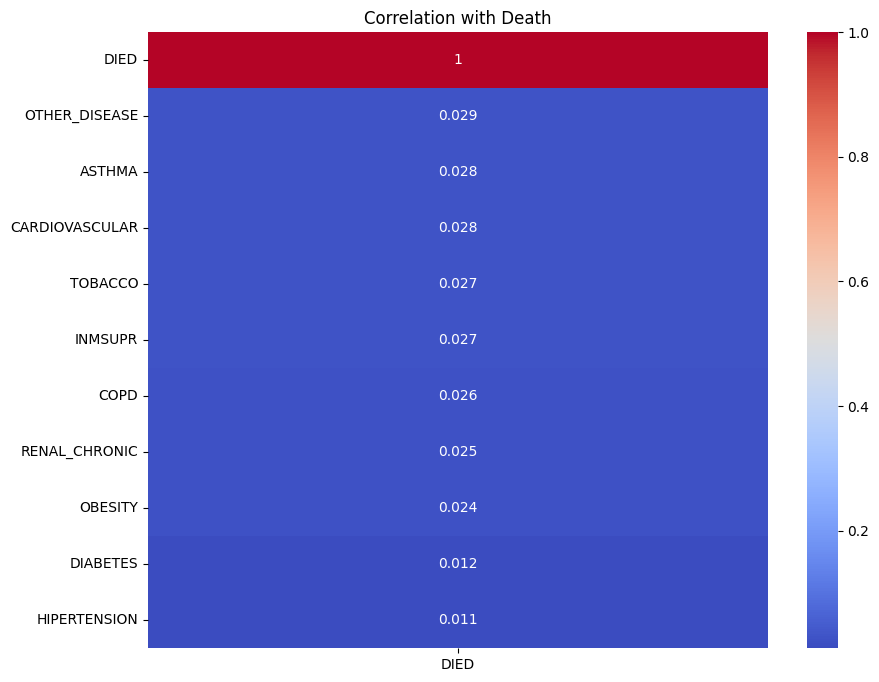

## 🧍 Deaths Over Time by Gender

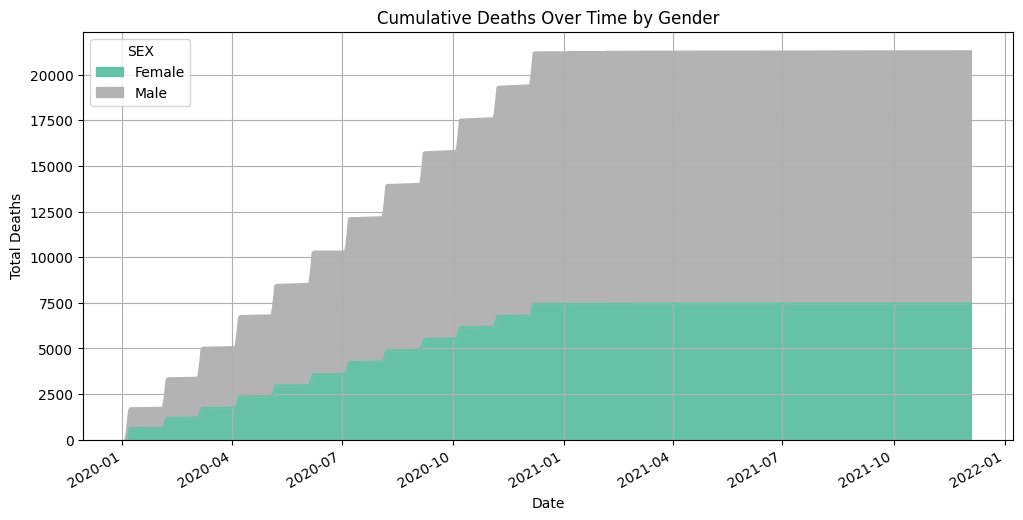

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from IPython.display import display, Markdown

df = pd.read_csv("/kaggle/input/covid19-dataset/Covid Data.csv") 

df['DATE_DIED'] = df['DATE_DIED'].replace('9999-99-99', np.nan)
df['DIED'] = df['DATE_DIED'].notna().astype(int)

df = df[df['CLASIFFICATION_FINAL'].isin([1, 2, 3])]

df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'], errors='coerce')
deaths_per_day = df['DATE_DIED'].value_counts().sort_index().cumsum()

display(Markdown("## 📈 Cumulative Deaths Over Time"))
plt.figure(figsize=(12, 5))
deaths_per_day.plot()
plt.title("Cumulative COVID-19 Deaths")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.grid(True)
plt.show()

display(Markdown("## 🧓 Deaths by Age"))
plt.figure(figsize=(10, 4))
sns.histplot(df[df['DIED'] == 1]['AGE'], bins=30, color='red')
plt.title("Age Distribution of COVID-19 Deaths")
plt.xlabel("Age")
plt.show()

display(Markdown("## 🩺 Mortality by Comorbidities"))
comorbidities = [
    'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
    'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO'
]

death_stats = {}
for col in comorbidities:
    rate = df[df[col] == 1]['DIED'].mean()
    death_stats[col] = round(rate * 100, 2)

comorb_df = pd.DataFrame.from_dict(death_stats, orient='index', columns=['Mortality Rate (%)'])
comorb_df = comorb_df.sort_values(by='Mortality Rate (%)', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=comorb_df['Mortality Rate (%)'], y=comorb_df.index, palette='Reds_r')
plt.title("Mortality Rate by Comorbidity")
plt.xlabel("Mortality Rate (%)")
plt.ylabel("Comorbidity")
plt.show()

display(Markdown("## 🛏️ ICU & Intubation Outcomes"))
icu_mortality = df[df['ICU'] == 1]['DIED'].mean() * 100
intub_mortality = df[df['INTUBED'] == 1]['DIED'].mean() * 100

print(f"ICU Mortality Rate: {icu_mortality:.2f}%")
print(f"Intubated Mortality Rate: {intub_mortality:.2f}%")

display(Markdown("## 🔥 Heatmap of Comorbidity & Death"))
heatmap_df = df[comorbidities + ['DIED']]
corr = heatmap_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr[['DIED']].sort_values('DIED', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with Death")
plt.show()

display(Markdown("## 🧍 Deaths Over Time by Gender"))
df_gender = df[df['DIED'] == 1]
df_gender['DATE_DIED'] = pd.to_datetime(df_gender['DATE_DIED'])
death_by_gender = df_gender.groupby(['DATE_DIED', 'SEX']).size().unstack(fill_value=0)

death_by_gender.rename(columns={1: 'Female', 2: 'Male'}, inplace=True)

death_by_gender.cumsum().plot.area(figsize=(12, 6), stacked=True, colormap='Set2')
plt.title("Cumulative Deaths Over Time by Gender")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.grid(True)
plt.show()
